In [5]:
import keras
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

import os, sys, csv

In [6]:
gooddir = './training_image_set_2/goodImgs'
baddir = './training_image_set_2/badImgs'
goodImgs = os.listdir(gooddir)
badImgs = os.listdir(baddir)

In [7]:
goodImgs.sort()
badImgs.sort()

In [8]:
i = 0
trainingGood = []
testingGood = []
trainingBad = []
testingBad = []
for f in goodImgs:
    if i % 2 == 0:
        trainingGood.append(f)
    elif i % 2 != 0:
        testingGood.append(f)
    i += 1

In [9]:
j = 0
trainingBad = []
testingBad = []
for f in badImgs:
    if j % 2 == 0:
        trainingBad.append(f)
    elif j % 2 != 0:
        testingBad.append(f)
    j += 1

In [10]:
def grab_image(img_path):
    #path = dirs+'/'+img_path
    img = image.load_img(img_path, target_size=(128, 128), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x

In [11]:
trainingGoodArr = np.concatenate([grab_image('./training_image_set_2/goodImgs/'+f) for f in trainingGood])
testingGoodArr = np.concatenate([grab_image('./training_image_set_2/goodImgs/'+f) for f in testingGood])
trainingBadArr = np.concatenate([grab_image('./training_image_set_2/badImgs/'+f) for f in trainingBad])
testingBadArr = np.concatenate([grab_image('./training_image_set_2/badImgs/'+f) for f in testingBad])

In [12]:
training = np.concatenate((trainingGoodArr, trainingBadArr))
testing = np.concatenate((testingGoodArr, testingBadArr))

In [13]:
import csv
goodCSVData = ['0']
badCSVData = ['1']
with open('labels2.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    for i in trainingGood: #goodtrain
        writer.writerows(goodCSVData)
    for i in trainingBad: #badtrain
        writer.writerows(badCSVData)
    for i in testingGood:
        writer.writerows(goodCSVData)
    for i in testingBad:
        writer.writerows(badCSVData)
csvFile.close()

In [14]:
labels = []
with open('labels2.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\n')
    for row in readCSV:
        labels.append(row[0])

In [15]:
Y = keras.utils.to_categorical(labels)
Y.shape

(273, 2)

In [16]:
n = 0
m = 0
for f in trainingGood:
    n += 1
for f in trainingBad:
    n += 1
for f in testingGood:
    m += 1
for f in testingBad:
    m += 1
print(n)
print(m)

137
136


In [17]:
train_labels = Y[ : n]
test_labels = Y[n :]
print(training.shape)
print(testing.shape)
print(train_labels.shape)
print(test_labels.shape)

(137, 128, 128, 1)
(136, 128, 128, 1)
(137, 2)
(136, 2)


In [18]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3,3),
                              activation='relu',
                              input_shape=[training.shape[1],
                                           training.shape[2],
                                           training.shape[3]]))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128,128,1)))
model.add(keras.layers.ELU())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128,128,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())




model.add(keras.layers.Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr = 0.0001),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
elu_1 (ELU)                  (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 53824)             0         
__________

In [19]:
batch_size = 5
epochs = 10
history = model.fit(training, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 109 samples, validate on 28 samples
Epoch 1/10
109/109 [==============================] - 10s 93ms/step - loss: 0.8576 - acc: 0.7156 - val_loss: 4.1011 - val_acc: 0.1071
Epoch 2/10
109/109 [==============================] - 9s 80ms/step - loss: 0.4095 - acc: 0.8440 - val_loss: 1.8483 - val_acc: 0.4643
Epoch 3/10
109/109 [==============================] - 9s 79ms/step - loss: 0.1513 - acc: 0.9725 - val_loss: 2.6087 - val_acc: 0.3571
Epoch 4/10
109/109 [==============================] - 9s 79ms/step - loss: 0.0455 - acc: 1.0000 - val_loss: 1.7459 - val_acc: 0.5000
Epoch 5/10
109/109 [==============================] - 9s 79ms/step - loss: 0.0220 - acc: 1.0000 - val_loss: 1.1751 - val_acc: 0.6429
Epoch 6/10
109/109 [==============================] - 9s 79ms/step - loss: 0.0165 - acc: 1.0000 - val_loss: 1.1639 - val_acc: 0.6429
Epoch 7/10
109/109 [==============================] - 9s 80ms/step - loss: 0.0109 - acc: 1.0000 - val_loss: 

In [20]:
score = model.evaluate(testing, test_labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

136/136 [==============================] - 2s 11ms/step
Test loss: 0.31926756571320924
Test accuracy: 0.9117647058823529


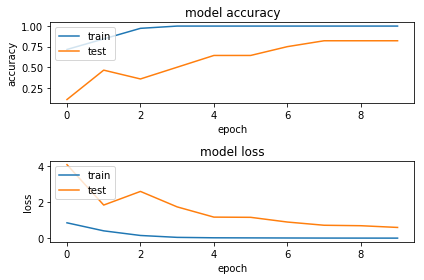

In [21]:
plt.figure(1)  
  
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 

plt.tight_layout()
plt.show()  

In [2]:
from keras.models import model_from_json

# serialize model to JSON
#model_json = model.to_json()
#with open("model3.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model3.h5")
#print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model2.h5")
#print("Loaded model from disk")

# evaluate loaded model on test data
#loaded_model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adam(),
#              metrics=['accuracy'])
#score = loaded_model.evaluate(data_test, data_test_labels, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.


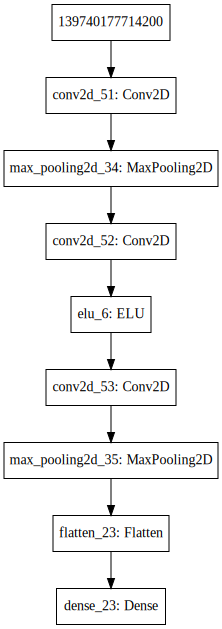

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog = 'dot', format = 'svg'))

In [39]:
#a = os.listdir('./training_image_set_2/goodImgs')
#for f in a:
#    i = grab_image('./training_image_set_2/goodImgs/'+f)
#    print('File name:', f, ' Prediction:', model.predict(i))
    
#print('/n/n/n/n')

#b = os.listdir('./training_image_set_2/badImgs')
#for f in b:
#    i = grab_image('./training_image_set_2/badImgs/'+f)
#    print('File name:', f, ' Prediction:', model.predict(i))